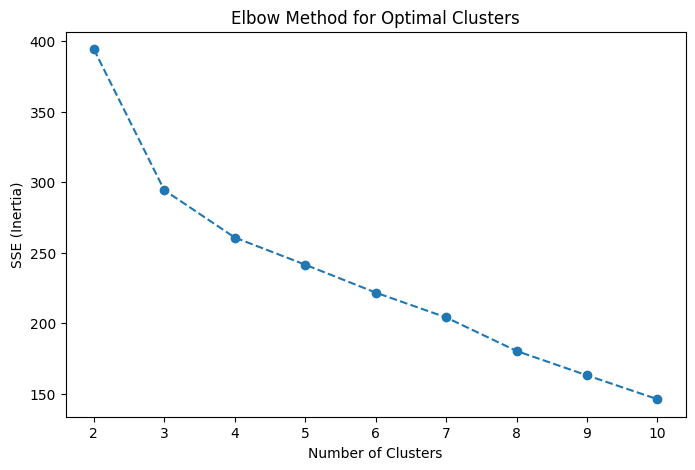

Davies-Bouldin Index: 1.3725624027173158
Silhouette Score: 0.22343888306886356


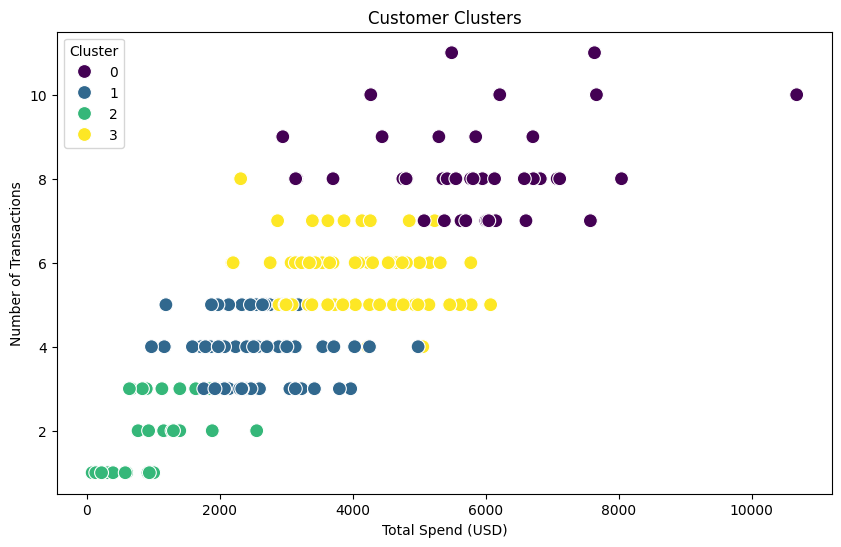

Customer Clusters saved to Customer_Clusters.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
data = transactions.merge(customers, on="CustomerID", how="left")

# Feature Engineering: Aggregated metrics for each customer
customer_features = data.groupby("CustomerID").agg({
    'TotalValue': 'sum',                      # Total spend
    'TransactionID': 'count',                 # Number of transactions
    'ProductID': 'nunique',                   # Number of unique products purchased
    'Region': 'first',                        # Customer region
}).reset_index()

# Preprocessing: Encode categorical variables and scale numerical features
encoder = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Region'])
], remainder='passthrough')

scaler = StandardScaler()

processed_data = encoder.fit_transform(customer_features[['Region']])
numerical_features = scaler.fit_transform(customer_features[['TotalValue', 'TransactionID', 'ProductID']])
final_features = np.hstack([processed_data.toarray(), numerical_features])

# Determine optimal number of clusters using the elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.show()





In [ ]:
# Apply K-Means with the chosen number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(final_features)

# Evaluate clustering metrics
db_index = davies_bouldin_score(final_features, customer_features['Cluster'])
silhouette_avg = silhouette_score(final_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.3725624027173158
Silhouette Score: 0.22343888306886356


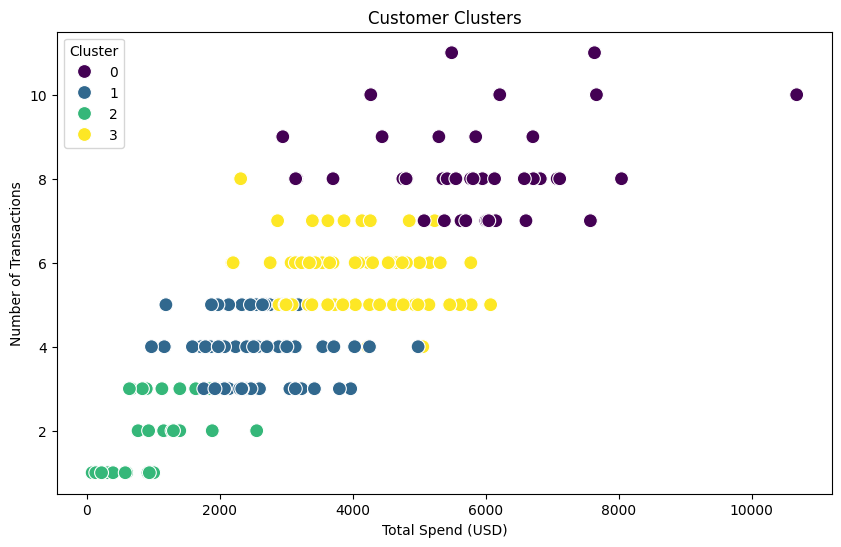

Customer Clusters saved to Customer_Clusters.csv


In [ ]:

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features['TotalValue'], y=customer_features['TransactionID'],
    hue=customer_features['Cluster'], palette='viridis', s=100
)
plt.title('Customer Clusters')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.show()

# Save results
customer_features.to_csv("Customer_Clusters.csv", index=False)
print("Customer Clusters saved to Customer_Clusters.csv")